In [76]:
import pandas as pd
import numpy as np

In [77]:
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])

In [78]:
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [79]:
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')

In [80]:
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [81]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
enc = OneHotEncoder(handle_unknown='ignore')

In [83]:
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

In [84]:
bridge_df = bridge_df.join(enc_df)
bridge_df

,Bridge_Types,Bridge_Types_Cat,0,1,2,3,4,5,6
0,Arch,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Tied Arch,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
enc.categories_

[array([0, 1, 2, 3, 4, 5, 6], dtype=int8)]

In [86]:
from sklearn.metrics import roc_curve


In [87]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)

In [88]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [89]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [90]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [120]:

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [127]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [121]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict(x_new)

In [122]:
x_new.shape

(1000, 1)

In [123]:
y_proba=y_proba.reshape(-1,1)

In [131]:
y_proba[:,0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [124]:
decision_boundry=x_new[y_proba.reshape(-1,1)>=0.5]
print(decision_boundry)

[1.65165165 1.65465465 1.65765766 1.66066066 1.66366366 1.66666667
 1.66966967 1.67267267 1.67567568 1.67867868 1.68168168 1.68468468
 1.68768769 1.69069069 1.69369369 1.6966967  1.6996997  1.7027027
 1.70570571 1.70870871 1.71171171 1.71471471 1.71771772 1.72072072
 1.72372372 1.72672673 1.72972973 1.73273273 1.73573574 1.73873874
 1.74174174 1.74474474 1.74774775 1.75075075 1.75375375 1.75675676
 1.75975976 1.76276276 1.76576577 1.76876877 1.77177177 1.77477477
 1.77777778 1.78078078 1.78378378 1.78678679 1.78978979 1.79279279
 1.7957958  1.7987988  1.8018018  1.8048048  1.80780781 1.81081081
 1.81381381 1.81681682 1.81981982 1.82282282 1.82582583 1.82882883
 1.83183183 1.83483483 1.83783784 1.84084084 1.84384384 1.84684685
 1.84984985 1.85285285 1.85585586 1.85885886 1.86186186 1.86486486
 1.86786787 1.87087087 1.87387387 1.87687688 1.87987988 1.88288288
 1.88588589 1.88888889 1.89189189 1.89489489 1.8978979  1.9009009
 1.9039039  1.90690691 1.90990991 1.91291291 1.91591592 1.918918

In [125]:
import matplotlib.pyplot as plt

In [138]:
y_proba.shape

(1000, 2)

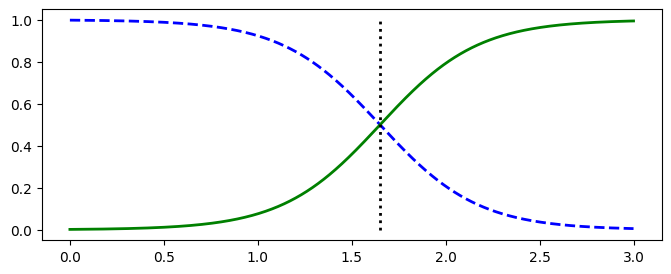

In [139]:


X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–2

plt.show()


